In [1]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import glob

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
all_files = glob.glob('*.csv')
all_files.remove('MTeamSpellings.csv')
all_files

['MNCAATourneyDetailedResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MSeasons.csv',
 'MEvents2018.csv',
 'MEvents2019.csv',
 'MPlayers.csv',
 'MRegularSeasonDetailedResults.csv',
 'MNCAATourneySlots.csv',
 'MGameCities.csv',
 'MSampleSubmissionStage1_2020.csv',
 'MConferenceTourneyGames.csv',
 'Cities.csv',
 'MRegularSeasonCompactResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MTeamConferences.csv',
 'MTeamCoaches.csv',
 'MEvents2017.csv',
 'MMasseyOrdinals.csv',
 'MEvents2016.csv',
 'Conferences.csv',
 'MTeams.csv',
 'MNCAATourneySeeds.csv',
 'MEvents2015.csv',
 'MSecondaryTourneyTeams.csv',
 'MSecondaryTourneyCompactResults.csv']

In [3]:
dic = {}
for idx, i in enumerate(all_files):
    exec(f'df{idx} = pd.read_csv(i)')
    dic[idx] = i

In [4]:
for x in dic:
    print(dic[x])
    exec(f'display(df{x}.head())')
    print()
    print()
    print()
    print()
dic

MNCAATourneyDetailedResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19






MNCAATourneyCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0






MSeasons.csv


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast






MEvents2018.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,7850408,2018,11,1104,1272,82,70,0,0,15,1104,130,made3,unk,0,0,0
1,7850409,2018,11,1104,1272,82,70,0,0,15,1104,129,assist,NaN,0,0,0
2,7850410,2018,11,1104,1272,82,70,0,0,39,1272,6242,turnover,unk,0,0,0
3,7850411,2018,11,1104,1272,82,70,0,0,43,1104,143,miss2,jump,0,0,0
4,7850412,2018,11,1104,1272,82,70,0,0,43,1104,129,reb,off,0,0,0






MEvents2019.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,10442717,2019,1,1104,1380,82,62,0,0,18,1380,10314,made2,jump,0,0,0
1,10442718,2019,1,1104,1380,82,62,0,0,18,1380,10307,assist,NaN,0,0,0
2,10442719,2019,1,1104,1380,82,62,0,0,42,1104,129,made2,jump,0,0,0
3,10442720,2019,1,1104,1380,82,62,0,0,58,1380,10303,turnover,unk,0,0,0
4,10442721,2019,1,1104,1380,82,62,0,0,63,1104,143,made3,unk,0,0,0






MPlayers.csv


,PlayerID,LastName,FirstName,TeamID
0,1,Albright,Christian,1101
1,2,Cameron,Tobias,1101
2,3,Cobb,Chase,1101
3,4,Cooke,Austin,1101
4,5,Crnic,Jovan,1101






MRegularSeasonDetailedResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14






MNCAATourneySlots.csv


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12






MGameCities.csv


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027






MSampleSubmissionStage1_2020.csv


,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5






MConferenceTourneyGames.csv


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273






Cities.csv


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA






MRegularSeasonCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0






MNCAATourneySeedRoundSlots.csv


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152






MTeamConferences.csv


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac






MTeamCoaches.csv


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney






MEvents2017.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,5216688,2017,11,1104,1157,70,53,0,0,0,1104,6977,sub,in,0,0,0
1,5216689,2017,11,1104,1157,70,53,0,0,15,1157,1899,foul,unk,0,0,0
2,5216690,2017,11,1104,1157,70,53,0,0,15,1157,1899,turnover,unk,0,0,0
3,5216691,2017,11,1104,1157,70,53,0,0,26,1104,140,made3,unk,0,0,0
4,5216692,2017,11,1104,1157,70,53,0,0,26,1104,151,assist,NaN,0,0,0






MMasseyOrdinals.csv


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260






MEvents2016.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,2560826,2016,11,1104,1244,77,64,0,0,13,1104,151,miss2,lay,0,0,0
1,2560827,2016,11,1104,1244,77,64,0,0,13,1104,151,reb,off,0,0,0
2,2560828,2016,11,1104,1244,77,64,0,0,16,1244,5199,foul,unk,0,0,0
3,2560829,2016,11,1104,1244,77,64,0,0,16,1104,151,miss1,unk,0,0,0
4,2560830,2016,11,1104,1244,77,64,0,0,16,1104,0,reb,deadb,0,0,0






Conferences.csv


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference






MTeams.csv


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020






MNCAATourneySeeds.csv


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374






MEvents2015.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0






MSecondaryTourneyTeams.csv


,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139
3,1985,NIT,1145
4,1985,NIT,1151






MSecondaryTourneyCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT
3,1985,136,1231,79,1139,57,H,0,NIT
4,1985,136,1249,78,1222,71,H,0,NIT


{0: 'MNCAATourneyDetailedResults.csv',
 1: 'MNCAATourneyCompactResults.csv',
 2: 'MSeasons.csv',
 3: 'MEvents2018.csv',
 4: 'MEvents2019.csv',
 5: 'MPlayers.csv',
 6: 'MRegularSeasonDetailedResults.csv',
 7: 'MNCAATourneySlots.csv',
 8: 'MGameCities.csv',
 9: 'MSampleSubmissionStage1_2020.csv',
 10: 'MConferenceTourneyGames.csv',
 11: 'Cities.csv',
 12: 'MRegularSeasonCompactResults.csv',
 13: 'MNCAATourneySeedRoundSlots.csv',
 14: 'MTeamConferences.csv',
 15: 'MTeamCoaches.csv',
 16: 'MEvents2017.csv',
 17: 'MMasseyOrdinals.csv',
 18: 'MEvents2016.csv',
 19: 'Conferences.csv',
 20: 'MTeams.csv',
 21: 'MNCAATourneySeeds.csv',
 22: 'MEvents2015.csv',
 23: 'MSecondaryTourneyTeams.csv',
 24: 'MSecondaryTourneyCompactResults.csv'}

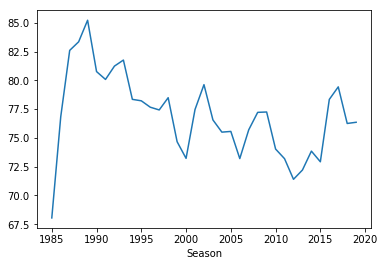

In [110]:
df1.groupby(['Season'])['WScore'].mean().plot(kind='line');

In [5]:
for idx, x in enumerate(df6.Season):
    df6.loc[idx, 'Scorediff'] = df6['WScore'].iloc[idx] - df6['LScore'].iloc[idx]
    df6.loc[idx, '2FG%diff'] = ((df6['WFGM'].iloc[idx] - df6['WFGM3'].iloc[idx])/(df6['WFGA'].iloc[idx] - df6['WFGA3'].iloc[idx])) - ((df6['LFGM'].iloc[idx] - df6['LFGM3'].iloc[idx])/(df6['LFGA'].iloc[idx] - df6['LFGA3'].iloc[idx]))
    df6.loc[idx, '3FG%diff'] = (df6['WFGM3'].iloc[idx]/df6['WFGA3'].iloc[idx]) - (df6['LFGM3'].iloc[idx]/df6['LFGA3'].iloc[idx])
    df6.loc[idx, 'FT%diff'] = (df6['WFTM'].iloc[idx]/df6['WFTA'].iloc[idx]) - (df6['LFTM'].iloc[idx]/df6['LFTA'].iloc[idx])
    df6.loc[idx, '2FGMdiff'] = ((df6['WFGM'].iloc[idx] - df6['WFGM3'].iloc[idx]) - (df6['LFGM'].iloc[idx] - df6['LFGM3'].iloc[idx]))
    df6.loc[idx, '3FGMdiff'] = (df6['WFGM3'].iloc[idx] - df6['LFGM3'].iloc[idx])
    df6.loc[idx, 'FTMdiff'] = (df6['WFTM'].iloc[idx] - df6['LFTM'].iloc[idx])
    df6.loc[idx, '2FGAdiff'] = ((df6['WFGA'].iloc[idx] - df6['WFGA3'].iloc[idx]) - (df6['LFGA'].iloc[idx] - df6['LFGA3'].iloc[idx]))
    df6.loc[idx, '3FGAdiff'] = (df6['WFGA3'].iloc[idx] - df6['LFGA3'].iloc[idx])
    df6.loc[idx, 'FTAdiff'] = (df6['WFTA'].iloc[idx] - df6['LFTA'].iloc[idx])
    df6.loc[idx, 'ORdiff'] = (df6['WOR'].iloc[idx] - df6['LOR'].iloc[idx])
    df6.loc[idx, 'DRdiff'] = (df6['WDR'].iloc[idx] - df6['LDR'].iloc[idx])
    df6.loc[idx, 'TRdiff'] = (df6['WOR'].iloc[idx] + df6['WDR'].iloc[idx]) - (df6['LOR'].iloc[idx] + df6['LDR'].iloc[idx])
    df6.loc[idx, 'Adiff'] = (df6['WAst'].iloc[idx] - df6['LAst'].iloc[idx])
    df6.loc[idx, 'TOdiff'] = (df6['WTO'].iloc[idx] - df6['LTO'].iloc[idx])
    df6.loc[idx, 'STdiff'] = (df6['WStl'].iloc[idx] - df6['LStl'].iloc[idx])
    df6.loc[idx, 'BLKdiff'] = (df6['WBlk'].iloc[idx] - df6['LBlk'].iloc[idx])
    df6.loc[idx, 'PFdiff'] = (df6['WPF'].iloc[idx] - df6['LPF'].iloc[idx])

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [6]:
import pickle
df6.to_pickle("mar7df6.pkl")

In [7]:
for idx, x in enumerate(df0.Season):
    df0.loc[idx, 'Scorediff'] = df0['WScore'].iloc[idx] - df0['LScore'].iloc[idx]
    df0.loc[idx, '2FG%diff'] = ((df0['WFGM'].iloc[idx] - df0['WFGM3'].iloc[idx])/(df0['WFGA'].iloc[idx] - df0['WFGA3'].iloc[idx])) - ((df0['LFGM'].iloc[idx] - df0['LFGM3'].iloc[idx])/(df0['LFGA'].iloc[idx] - df0['LFGA3'].iloc[idx]))
    df0.loc[idx, '3FG%diff'] = (df0['WFGM3'].iloc[idx]/df0['WFGA3'].iloc[idx]) - (df0['LFGM3'].iloc[idx]/df0['LFGA3'].iloc[idx])
    df0.loc[idx, 'FT%diff'] = (df0['WFTM'].iloc[idx]/df0['WFTA'].iloc[idx]) - (df0['LFTM'].iloc[idx]/df0['LFTA'].iloc[idx])
    df0.loc[idx, '2FGMdiff'] = ((df0['WFGM'].iloc[idx] - df0['WFGM3'].iloc[idx]) - (df0['LFGM'].iloc[idx] - df0['LFGM3'].iloc[idx]))
    df0.loc[idx, '3FGMdiff'] = (df0['WFGM3'].iloc[idx] - df0['LFGM3'].iloc[idx])
    df0.loc[idx, 'FTMdiff'] = (df0['WFTM'].iloc[idx] - df0['LFTM'].iloc[idx])
    df0.loc[idx, '2FGAdiff'] = ((df0['WFGA'].iloc[idx] - df0['WFGA3'].iloc[idx]) - (df0['LFGA'].iloc[idx] - df0['LFGA3'].iloc[idx]))
    df0.loc[idx, '3FGAdiff'] = (df0['WFGA3'].iloc[idx] - df0['LFGA3'].iloc[idx])
    df0.loc[idx, 'FTAdiff'] = (df0['WFTA'].iloc[idx] - df0['LFTA'].iloc[idx])
    df0.loc[idx, 'ORdiff'] = (df0['WOR'].iloc[idx] - df0['LOR'].iloc[idx])
    df0.loc[idx, 'DRdiff'] = (df0['WDR'].iloc[idx] - df0['LDR'].iloc[idx])
    df0.loc[idx, 'TRdiff'] = (df0['WOR'].iloc[idx] + df0['WDR'].iloc[idx]) - (df0['LOR'].iloc[idx] + df0['LDR'].iloc[idx])
    df0.loc[idx, 'Adiff'] = (df0['WAst'].iloc[idx] - df0['LAst'].iloc[idx])
    df0.loc[idx, 'TOdiff'] = (df0['WTO'].iloc[idx] - df0['LTO'].iloc[idx])
    df0.loc[idx, 'STdiff'] = (df0['WStl'].iloc[idx] - df0['LStl'].iloc[idx])
    df0.loc[idx, 'BLKdiff'] = (df0['WBlk'].iloc[idx] - df0['LBlk'].iloc[idx])
    df0.loc[idx, 'PFdiff'] = (df0['WPF'].iloc[idx] - df0['LPF'].iloc[idx])

In [8]:
test = list(df0.WTeamID.unique())
test.extend(x for x in list(df0.LTeamID.unique()) if x not in test)
df = pd.DataFrame(test, columns = ['TeamID'])

In [9]:
for idx, x in enumerate(df.TeamID):
    for i in ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
              '2013', '2014', '2015', '2016', '2017', '2018', '2019']:
        proxy = df17[df17['Season'] == int(i)]
        proxy = proxy[proxy['RankingDayNum'] == 133]
        if x in proxy.TeamID.unique():
            df.loc[idx, i] = proxy[proxy['TeamID'] == x].OrdinalRank.mean()
        else:
            pass

In [10]:
import pickle
df0.to_pickle("mar7df0.pkl")

In [11]:
for idx, x in enumerate(df0.WTeamID):
    idxl = df[df['TeamID'] == df0.iloc[idx]['LTeamID']].index.tolist()[0]
    idxw = df[df['TeamID'] == df0.iloc[idx]['WTeamID']].index.tolist()[0]
    year = df0.Season[idx]
    df0.loc[idx, 'Rankdiff'] = df[str(year)][idxl] - df[str(year)][idxw]

In [12]:
for idx, x in enumerate(df6.WTeamID):
    proxy = df17[df17['Season'] == df6.Season[idx]]
    proxy = proxy[proxy['RankingDayNum'] <= df6['DayNum'][idx]]
    proxyw = proxy[proxy['TeamID'] == x]
    proxyl = proxy[proxy['TeamID'] == df6['LTeamID'][idx]]
    if proxyw.empty == True:
        pass
    elif proxyl.empty == True:
        pass
    else:
        proxyw = proxyw[proxyw['RankingDayNum'] == proxyw['RankingDayNum'].iloc[-1]]
        proxyl = proxyl[proxyl['RankingDayNum'] == proxyl['RankingDayNum'].iloc[-1]]
        df6.loc[idx, 'Rankdiff'] = proxyl.OrdinalRank.mean() - proxyw.OrdinalRank.mean()

In [13]:
import pickle
df6.to_pickle("df6postrank.pkl")

In [14]:
for idx, x in enumerate(df20.TeamID):
    for i in ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
              '2013', '2014', '2015', '2016', '2017', '2018', '2019']:
        if df20.FirstD1Season[idx] <= int(i) <= df20.LastD1Season[idx]:
            df20.loc[idx, i] = int(i) - df20.FirstD1Season[idx]
        else:
            df20.loc[idx, i] = 0
for idx, x in enumerate(df6.WTeamID):
    idxl = df20[df20['TeamID'] == df6.iloc[idx]['LTeamID']].index.tolist()[0]
    idxw = df20[df20['TeamID'] == df6.iloc[idx]['WTeamID']].index.tolist()[0]
    df6.loc[idx, 'Existencediff'] = df20[str(df6.Season[idx])][idxw] - df20[str(df6.Season[idx])][idxl]
for idx, x in enumerate(df0.WTeamID):
    idxl = df20[df20['TeamID'] == df0.iloc[idx]['LTeamID']].index.tolist()[0]
    idxw = df20[df20['TeamID'] == df0.iloc[idx]['WTeamID']].index.tolist()[0]
    df0.loc[idx, 'Existencediff'] = df20[str(df0.Season[idx])][idxw] - df20[str(df0.Season[idx])][idxl]

In [17]:
import pickle
df6.to_pickle("df6postexistence.pkl")
import pickle
df0.to_pickle("df0postexistence.pkl")

In [28]:
def set_target(df):
    for idx, x in enumerate(df.WTeamID):
        if x < df.LTeamID[idx]:
            df.loc[idx, 'ID'] = str(df.Season[idx]) + '_' + str(x) + '_' + str(df.LTeamID[idx])
            df.loc[idx, 'target'] = 1
        else:
            df.loc[idx, 'ID'] = str(df.Season[idx]) + '_' + str(df.LTeamID[idx]) + '_' + str(x)
            df.loc[idx, 'target'] = 0
    return df

In [32]:
df_test = set_target(df6)

In [34]:
import pickle
df6.to_pickle("df6wtarget.pkl")
import pickle
df0.to_pickle("df0wtarget.pkl")

In [5]:
df6 = pd.read_pickle("df6wtarget.pkl")
df0 = pd.read_pickle("df0wtarget.pkl")

In [6]:
display(df6.head())
df0.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,TRdiff,Adiff,TOdiff,STdiff,BLKdiff,PFdiff,Rankdiff,Existencediff,ID,target
0,2003,10,1104,68,1328,62,N,0,27,58,...,6.0,5.0,5.0,-2.0,-1.0,2.0,NaN,0.0,2003_1104_1328,1.0
1,2003,10,1272,70,1393,63,N,0,26,62,...,-2.0,9.0,1.0,-4.0,-2.0,2.0,NaN,0.0,2003_1272_1393,1.0
2,2003,11,1266,73,1437,61,N,0,24,58,...,-10.0,6.0,-2.0,3.0,-3.0,2.0,NaN,0.0,2003_1266_1437,1.0
3,2003,11,1296,56,1457,50,N,0,18,38,...,-12.0,2.0,-7.0,10.0,-1.0,-5.0,NaN,2.0,2003_1296_1457,1.0
4,2003,11,1400,77,1208,71,N,0,30,61,...,3.0,0.0,4.0,-3.0,3.0,6.0,NaN,0.0,2003_1208_1400,0.0


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,TRdiff,Adiff,TOdiff,STdiff,BLKdiff,PFdiff,Rankdiff,Existencediff,ID,target
0,2003,134,1421,92,1411,84,N,1,32,69,...,-1.0,1.0,-3.0,0.0,3.0,0.0,-1.062500,-2.0,2003_1411_1421,0.0
1,2003,136,1112,80,1436,51,N,0,31,66,...,13.0,10.0,-1.0,0.0,4.0,-7.0,150.448529,0.0,2003_1112_1436,1.0
2,2003,136,1113,84,1272,71,N,0,31,59,...,-5.0,7.0,-3.0,5.0,-1.0,1.0,-14.294118,0.0,2003_1113_1272,1.0
3,2003,136,1141,79,1166,73,N,0,29,53,...,0.0,-5.0,-3.0,7.0,-5.0,-2.0,-24.952206,0.0,2003_1141_1166,1.0
4,2003,136,1143,76,1301,74,N,1,27,64,...,2.0,1.0,-1.0,3.0,-6.0,-5.0,13.906250,0.0,2003_1143_1301,1.0


In [34]:
def create_dataset(df1, df2):
    eh = list(df1.columns)
    history = df1.drop([e for e in eh if e not in ('target', 'Season', 'WTeamID', 'LTeamID')], axis = 1)
    for x in ['Scorediff', '2FG%diff', '3FG%diff', 'FT%diff', '2FGMdiff', '3FGMdiff', 'FTMdiff',
              '2FGAdiff', '3FGAdiff', 'FTAdiff', 'ORdiff', 'DRdiff','TRdiff', 'Adiff', 'TOdiff',
              'STdiff', 'BLKdiff', 'PFdiff', 'Rankdiff', 'Existencediff']:
        proxyw1 = df2.groupby(['Season', 'WTeamID']).agg({x:['mean']}).reset_index()
        proxyw1.columns = ['Season', 'WTeamID1', 'W' + x + 'mean']
        proxyl1 = df2.groupby(['Season', 'LTeamID']).agg({x:['mean']}).reset_index()
        proxyl1.columns = ['Season', 'LTeamID1', 'L' + x + 'mean']
        proxyw2 = df2.groupby(['Season', 'WTeamID']).agg({x:['mean']}).reset_index()
        proxyw2.columns = ['Season', 'WTeamID2', 'W' + x + 'mean']
        proxyl2 = df2.groupby(['Season', 'LTeamID']).agg({x:['mean']}).reset_index()
        proxyl2.columns = ['Season', 'LTeamID2', 'L' + x + 'mean']
        new = list(proxyl1.columns)
        for x in [e for e in new if e not in ('target', 'Season', 'LTeamID1')]:
            proxyl1[x] = proxyl1[x] * -1
        new = list(proxyl2.columns)
        for x in [e for e in new if e not in ('target', 'Season', 'LTeamID2')]:
            proxyl2[x] = proxyl2[x] * -1
        history = pd.merge(history, proxyw1, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'WTeamID1'])
        history = pd.merge(history, proxyw2, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'WTeamID2'])
        history = pd.merge(history, proxyl1, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'LTeamID1'])
        history = pd.merge(history, proxyl2, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'LTeamID2'])
    history.drop(['WTeamID1_x', 'LTeamID1_x', 'WTeamID2_x', 'LTeamID2_x',
                  'WTeamID1_y', 'LTeamID1_y', 'WTeamID2_y', 'LTeamID2_y'], axis=1, inplace=True)
    return history
              
df = create_dataset(df0, df6)
df.head()

,Season,WTeamID,LTeamID,target,WScorediffmean_x,WScorediffmean_y,LScorediffmean_x,LScorediffmean_y,W2FG%diffmean_x,W2FG%diffmean_y,...,LPFdiffmean_x,LPFdiffmean_y,WRankdiffmean_x,WRankdiffmean_y,LRankdiffmean_x,LRankdiffmean_y,WExistencediffmean_x,WExistencediffmean_y,LExistencediffmean_x,LExistencediffmean_y
0,2003,1421,1411,0.0,6.384615,9.055556,-8.666667,-18.312500,0.018879,0.072330,...,-0.333333,1.812500,3.352777,50.466468,21.796679,-68.619722,4.615385,1.722222,3.666667,0.6875
1,2003,1112,1436,1.0,17.280000,12.052632,-9.400000,-4.333333,0.070258,0.051392,...,1.400000,-0.000000,89.732286,80.146546,-19.399985,89.988235,0.000000,5.631579,1.700000,-0.0000
2,2003,1113,1272,1.0,17.388889,12.695652,-6.666667,-10.545455,0.123670,0.069588,...,0.833333,-0.363636,85.418854,69.091621,45.041637,5.818939,0.000000,0.608696,-0.000000,-0.0000
3,2003,1141,1166,1.0,11.173913,17.793103,-6.000000,-13.333333,0.118878,0.114253,...,1.750000,4.833333,55.940679,150.311302,79.875179,53.670000,0.304348,0.724138,-0.000000,-0.0000
4,2003,1143,1301,1.0,10.380952,15.055556,-11.583333,-10.125000,0.034483,0.091245,...,3.333333,2.250000,80.564358,37.771254,4.592911,13.277300,0.047619,0.888889,-0.000000,-0.0000


In [35]:
proxyw1 = df6.groupby(['Season', 'WTeamID']).agg({'Scorediff':['count']}).reset_index()
proxyw1.columns = ['Season', 'WTeamID1', 'WCount']
proxyl1 = df6.groupby(['Season', 'LTeamID']).agg({'Scorediff':['count']}).reset_index()
proxyl1.columns = ['Season', 'LTeamID1', 'LCount']
proxyw2 = df6.groupby(['Season', 'WTeamID']).agg({'Scorediff':['count']}).reset_index()
proxyw2.columns = ['Season', 'WTeamID2', 'WCount']
proxyl2 = df6.groupby(['Season', 'LTeamID']).agg({'Scorediff':['count']}).reset_index()
proxyl2.columns = ['Season', 'LTeamID2', 'LCount']
df = pd.merge(df, proxyw1, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'WTeamID1'])
df = pd.merge(df, proxyw2, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'WTeamID2'])
df = pd.merge(df, proxyl1, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'LTeamID1'])
df = pd.merge(df, proxyl2, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'LTeamID2'])
df.drop(['WTeamID1', 'LTeamID1', 'WTeamID2', 'LTeamID2',
                  'WTeamID1', 'LTeamID1', 'WTeamID2', 'LTeamID2'], axis=1, inplace=True)

In [36]:
y = list(df.columns)
y = [e for e in y if e not in ('target', 'Season', 'WTeamID', 'LTeamID')]
for i in y:
    for idx, x in enumerate(df[i]):
        if abs(x) == 0:
            df.loc[idx, i] = 0
        else:
            pass
df.dropna(inplace=True)
df.reset_index(drop = True, inplace=True)
df

,Season,WTeamID,LTeamID,target,WScorediffmean_x,WScorediffmean_y,LScorediffmean_x,LScorediffmean_y,W2FG%diffmean_x,W2FG%diffmean_y,...,LRankdiffmean_x,LRankdiffmean_y,WExistencediffmean_x,WExistencediffmean_y,LExistencediffmean_x,LExistencediffmean_y,WCount_x,WCount_y,LCount_x,LCount_y
0,2003,1421,1411,0.0,6.384615,9.055556,-8.666667,-18.312500,0.018879,0.072330,...,21.796679,-68.619722,4.615385,1.722222,3.666667,0.687500,13,18,12.0,16.0
1,2003,1112,1436,1.0,17.280000,12.052632,-9.400000,-4.333333,0.070258,0.051392,...,-19.399985,89.988235,0.000000,5.631579,1.700000,0.000000,25,19,10.0,3.0
2,2003,1113,1272,1.0,17.388889,12.695652,-6.666667,-10.545455,0.123670,0.069588,...,45.041637,5.818939,0.000000,0.608696,0.000000,0.000000,18,23,6.0,11.0
3,2003,1141,1166,1.0,11.173913,17.793103,-6.000000,-13.333333,0.118878,0.114253,...,79.875179,53.670000,0.304348,0.724138,0.000000,0.000000,23,29,4.0,6.0
4,2003,1143,1301,1.0,10.380952,15.055556,-11.583333,-10.125000,0.034483,0.091245,...,4.592911,13.277300,0.047619,0.888889,0.000000,0.000000,21,18,12.0,8.0
5,2003,1163,1140,0.0,16.904762,14.652174,-8.125000,-10.666667,0.115496,0.099632,...,81.891005,29.952675,1.619048,0.173913,0.125000,0.111111,21,23,8.0,9.0
6,2003,1181,1161,0.0,16.416667,11.411765,-11.846154,-7.833333,0.055089,0.084536,...,-28.762727,52.432576,0.000000,3.470588,0.000000,0.000000,24,17,13.0,6.0
7,2003,1211,1153,0.0,14.173913,14.176471,-7.090909,-6.375000,0.109413,0.073338,...,35.111605,72.790818,0.695652,0.000000,0.000000,0.000000,23,17,11.0,8.0
8,2003,1228,1443,1.0,18.833333,13.608696,-13.250000,-5.166667,0.156225,0.069832,...,56.572105,25.113200,1.250000,1.000000,0.000000,0.000000,24,23,8.0,6.0
9,2003,1242,1429,1.0,22.000000,10.318182,-6.375000,-8.142857,0.160494,0.029142,...,63.241071,12.458333,0.608696,2.681818,2.125000,0.000000,23,22,8.0,7.0


In [42]:
X = df.drop(['target', 'WTeamID', 'LTeamID', 'Season'], axis = 1)
y = df.target

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)
import numpy as np
import matplotlib.pyplot as plt
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

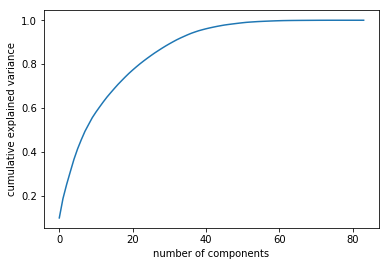

In [44]:
import numpy as np
import matplotlib.pyplot as plt
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=4)

In [90]:
pca = PCA(n_components=10)
pca.fit(X_new)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import time
start = time.time()
pca_clf = RandomForestClassifier().fit(X_train_pc,y_train)
print('Took', np.round(time.time()-start,2), 'seconds.')

print('Base Train Accuracy: ', accuracy_score(y_train, pca_clf.predict(X_train_pc)))
print('Base Test Accuracy: ', accuracy_score(y_test, pca_clf.predict(X_test_pc)))

Took 0.17 seconds.
Base Train Accuracy:  1.0
Base Test Accuracy:  0.562874251497006


In [41]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

pipelines = []
best_clfs = []
random_state = 4
pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA()),
                 ('ran', RandomForestClassifier(random_state=random_state))])
gs = GridSearchCV(estimator=pipe,
                  param_grid={'pca__n_components': [20,30,40,50],
                              'ran__n_estimators': [5, 10, 20, 50, 100],
                              'ran__criterion': [None, 'entropy', 'gini']})
gs.fit(X_train, y_train)
best_clfs.append(gs.best_estimator_)
pipelines.append(pipe)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will b

KeyboardInterrupt: 

In [115]:
team_loss_score = df12.groupby(['Season', 'LTeamID']).agg({'LScore':['sum', 'count']}).reset_index()

In [171]:
df9

,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5
5,2015_1107_1138,0.5
6,2015_1107_1139,0.5
7,2015_1107_1140,0.5
8,2015_1107_1153,0.5
9,2015_1107_1157,0.5


In [ ]:
## create list of classifiers
random_state = 4
classifiers = [LogisticRegression(random_state=random_state), 
               SVC(random_state=random_state), 
               DecisionTreeClassifier(random_state=random_state)]

## create list of params for grid search
params = [
    {'clf__C':[0.25, 0.50, 0.75, 1.0]}, ## Logistic Regression
    
    {'clf__kernel': ['poly', 'sigmoid'], ## SVM
     'clf__C': [0.01, 1, 100],
     'clf__degree': [2,3,4,5],
     'clf__gamma': [0.001, 0.01]},
    
    {'clf__criterion':['gini','entropy'],
     'clf__max_depth':[1,2,3,4],
     'clf__min_impurity_decrease':[0, 0.25, 0.50, 0.75]}
]